In [38]:
import numpy as np
from matplotlib import pyplot as plt


data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)


def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/dim)*s
    
    return w

def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:   
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
        
        #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        #plt.show()
        
        
        if check_True(pattern):
            print ("It took:",count,"nr of iterations")
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
  
        elif np.array_equal(pattern,previousPattern):
            print("Local minimum found in iteration:",count)
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
            
        previousPattern = np.copy(pattern)

def check_True(predicted_pattern):
    solved = False
    for i in range(patterns.shape[0]):
        if np.array_equal(patterns[i],predicted_pattern):
            #print("True! It matched pattern nr:",i)
            solved = True
    return solved

def flip(pattern, percentage):
    index = np.arange(pattern.size)
    np.random.shuffle(index)
    
    abso = int(percentage*pattern.size)
    flipIndex = index[:abso]
    
    flipped = np.copy(pattern)
    flipped[flipIndex] = -1*flipped[flipIndex]
    
    #plt.imshow(flipped.reshape(32,32),interpolation="nearest")
    #plt.show()
    
    return flipped

## Investigate Capacity
Here we want to investigate how many pictures the network is able to store

In [39]:
patterns = data[:9,:]
correctList = []

In [40]:
w = new_init_weights(patterns)

None


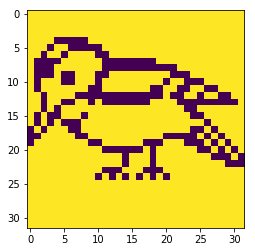

In [41]:
plt.imshow(patterns[5].reshape(32,32),interpolation="nearest")
plt.show()

### Now the same thing with some random patterns

In [42]:
random_patterns = []
nrOfVectors=144
for i in range(nrOfVectors):
    random_patterns.append(genRandVector(1024))
random_patterns = np.array(random_patterns)

correctList = [] #Global variable

[ 1.  1. -1. ..., -1. -1. -1.]
[ 1.  1. -1. ...,  1.  1.  1.]
[ 1.  1.  1. ...,  1.  1.  1.]
[-1. -1. -1. ..., -1.  1. -1.]
[ 1.  1.  1. ...,  1.  1.  1.]
[ 1.  1. -1. ...,  1.  1. -1.]
[ 1.  1.  1. ...,  1. -1. -1.]
[ 1.  1. -1. ...,  1. -1.  1.]
[-1. -1. -1. ..., -1.  1.  1.]
[ 1.  1.  1. ..., -1.  1. -1.]
[-1. -1.  1. ..., -1.  1.  1.]
[ 1. -1.  1. ..., -1.  1. -1.]
[-1. -1. -1. ...,  1. -1. -1.]
[-1. -1.  1. ..., -1.  1. -1.]
[ 1.  1. -1. ...,  1. -1. -1.]
[ 1. -1.  1. ..., -1. -1. -1.]
[-1. -1. -1. ...,  1. -1. -1.]
[ 1.  1.  1. ...,  1.  1.  1.]
[-1. -1.  1. ..., -1.  1. -1.]
[-1. -1. -1. ...,  1. -1.  1.]
[-1.  1.  1. ...,  1.  1. -1.]
[ 1. -1. -1. ...,  1.  1. -1.]
[-1. -1. -1. ..., -1. -1.  1.]
[ 1. -1.  1. ..., -1.  1. -1.]
[-1.  1. -1. ..., -1.  1. -1.]
[-1.  1.  1. ..., -1. -1.  1.]
[ 1.  1. -1. ...,  1.  1.  1.]
[-1. -1. -1. ..., -1.  1. -1.]
[ 1. -1. -1. ...,  1. -1. -1.]
[-1. -1. -1. ...,  1. -1.  1.]
[-1. -1. -1. ..., -1.  1. -1.]
[ 1. -1. -1. ...,  1.  1.  1.]
[ 1.  1.

In [43]:
w_rand = new_init_weights(random_patterns)

None


# 300 random patterns in a 100-unit network

In the section we're exploring how the stableness of stored patterns changes as the nr of patterns in the weight-matrix increases

In [60]:
def new_init_weights(patterns,distPatterns=np.array(0),zeroDiag=False):
    dim = patterns.shape[1]
    n = patterns.shape[0]
    w=np.zeros((dim,dim))
    
    correctList = []
    correctDistList = []
    
    for i in range(n): 
        w+=1/dim*np.multiply.outer(patterns[i],patterns[i])
        if(zeroDiag):
            np.fill_diagonal(w,0)
        correctList.append(experiment(w,i,patterns))
        if(distPatterns.size>1):
            correctDistList.append(experiment(w,i,distPatterns))
    return w, correctList, correctDistList

def experiment(w,iterations,patterns,plsReturn=False):
    N = patterns.shape[0] #Nr of patterns 
    outcomeList = []
    
    #Iterate over the amount of patterns that have been inserted to w
    for i in range(iterations+1):
        outcome = checkStable(patterns[i],w)
        outcomeList.append(outcome)

    unique,counts=np.unique(np.array(outcomeList),return_counts=True)
    a = dict(zip(unique, counts))
    #print("***With",iterations+1,"nr of patterns in w-matrix***")
    if True in a:
        #print(a[True],"of patterns remained stable\n")
        #correctList.append(a[True])
        return a[True]
    else:
        #print("none remained stable\n")
        #correctList.append(0)
        return 0
    if(plsReturn):
        return correctList
        
#Checks if pattern changes during one iteration, if not it's stable
def checkStable(pattern,w): 
    s = np.dot(w,pattern)
    s[s >= 0] = 1
    s[s < 0] = -1

    if(np.array_equal(pattern,s)):
        return True
    else:
        return False
        
def genRandVector(dim,withBias=False):
    if not withBias:
        dim = int(dim/2)
        randVector = np.concatenate([np.ones(dim),-1*np.ones(dim)])
    else:
        dim1 = int(dim/3)
        dim2 = int(dim*2/3)
        randVector = np.concatenate([np.ones(dim2),-1*np.ones(dim1)])
        
    np.random.shuffle(randVector)
    #print(randVector)
    return randVector

In [50]:
#Generate patterns and distorted versions of them

patterns = []
nrOfVectors=300
for i in range(nrOfVectors):
    patterns.append(genRandVector(144)) #Gets a 100 unit vector
patterns = np.array(patterns)

flipped_patterns = []
for pat in patterns:
    flipped_patterns.append(flip(pat,0.02))
flipped_patterns = np.array(flipped_patterns)

In [51]:
#Train on the patterns
w_1,correctList, correctDistList = new_init_weights(patterns,flipped_patterns)

[[ 1.  1.  1. ..., -1. -1.  1.]
 [-1.  1.  1. ...,  1.  1.  1.]
 [ 1. -1. -1. ...,  1.  1. -1.]
 ..., 
 [ 1. -1.  1. ...,  1.  1. -1.]
 [-1.  1.  1. ..., -1.  1. -1.]
 [ 1.  1. -1. ..., -1.  1. -1.]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(range(1,len(correctList)+1))

In [ ]:
x = range(1,len(correctList)+1)
y = np.divide(np.array(correctList),x)
plt.plot(x,y)
plt.title("Amount of stable patterns per pattern in w")
plt.show()

### Plot the distorted patterns

In [ ]:
x1 = range(1,len(correctDistList)+1)
y1 = np.divide(np.array(correctDistList),x)
plt.plot(x,y)
plt.plot(x1,y1)
plt.title("Amount of stable patterns per pattern in w when patterns are distorted")
plt.show()

### Adding a 0-diagonal t

In [ ]:
w_2, correctList0, correctDistList0 = new_init_weights(patterns,flipped_patterns,zeroDiag=True)

In [ ]:
plt.plot(range(len(correctList0)),correctList0)
plt.title("Amount of stable patterns per pattern in w with diagonalized w")
plt.show()

### Plot the distorted...

In [ ]:
plt.plot(range(len(correctDistList0)),correctDistList0)
plt.title("Amount of stable patterns per pattern in w\n with diagonalized w and distorted patterns")
plt.show()

## Now we add bias to the equation...

In [54]:
biased_patterns = []
nrOfVectors=300
for i in range(nrOfVectors):
    biased_patterns.append(genRandVector(144,True)) #Gets a 100 unit vector
biased_patterns = np.array(biased_patterns)

In [63]:
biased_patterns = np.sign(0.5+np.random.randn(300,144))

In [64]:
w_3, correctList, _ = new_init_weights(biased_patterns)

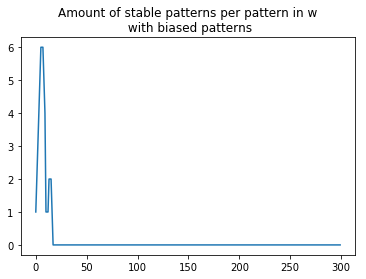

In [65]:
plt.plot(range(len(correctList)),correctList)
plt.title("Amount of stable patterns per pattern in w\n with biased patterns")
plt.show()